<a href="https://colab.research.google.com/github/Yatin91/ImageCaption/blob/main/ImageCaption_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
from tqdm import tqdm
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import Sequence
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Activation, Dropout, Flatten, Dense, Input, Layer
from tensorflow.keras.layers import Embedding, LSTM, add, Concatenate, Reshape, concatenate, Bidirectional
from tensorflow.keras.applications import VGG16, ResNet50, DenseNet201
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from textwrap import wrap

plt.rcParams['font.size'] = 12
sns.set_style("dark")
warnings.filterwarnings('ignore')

In [46]:
import opendatasets as od
import pandas

od.download(
    "https://www.kaggle.com/datasets/adityajn105/flickr8k")

100%|██████████| 1.04G/1.04G [00:12<00:00, 88.2MB/s]


In [47]:
image_path = '/content/ImageCaption/flickr8k/Images'

In [48]:
data = pd.read_csv("/content/ImageCaption/flickr8k/captions.txt")
data.head()

,image,caption
0,1000268201_693b08cb0e.jpg,A child in a pink dress is climbing up a set o...
1,1000268201_693b08cb0e.jpg,A girl going into a wooden building .
2,1000268201_693b08cb0e.jpg,A little girl climbing into a wooden playhouse .
3,1000268201_693b08cb0e.jpg,A little girl climbing the stairs to her playh...
4,1000268201_693b08cb0e.jpg,A little girl in a pink dress going into a woo...


In [49]:
print(data.sample(15))

                           image  \
31563  3567214106_6ece483f8b.jpg   
31469  3563924606_5914392cd8.jpg   
18674  3025495499_b15797b452.jpg   
11342  2559638792_a803ff63d1.jpg   
15837  2865409854_afedf98860.jpg   
1154   1273001772_1585562051.jpg   
36351   432496659_f01464d9fb.jpg   
3235   1659396176_ced00a549f.jpg   
1011   1244485675_822e6efe60.jpg   
7105   2281054343_95d6d3b882.jpg   
12855  2660008870_b672a4c76a.jpg   
38864   582788646_dc40748639.jpg   
36967   469021173_aa31c07108.jpg   
14703  2787276494_82703f570a.jpg   
31234  3556037801_3992ce6826.jpg   

                                                 caption  
31563            A dog plays in water from a sprinkler .  
31469                  Two puppies pulling on a string .  
18674  Female tennis player dressed in green hits yel...  
11342  A swimmer in a dark blue suit swimming backstr...  
15837  People are gathered in a city and barefoot chi...  
1154         Children and adults play with a sprinkler .  
36351    A

In [52]:
def readImage(path,img_size=224):
    img = load_img(path,color_mode='rgb',target_size=(img_size,img_size))
    img = img_to_array(img)
    img = img/255.

    return img

def display_images(temp_df):
    temp_df = temp_df.reset_index(drop=True)
    plt.figure(figsize = (20 , 20))
    n = 0
    for i in range(15):
        n+=1
        plt.subplot(5 , 5, n)
        plt.subplots_adjust(hspace = 0.7, wspace = 0.3)
        image = readImage(f"/content/ImageCaption/flickr8k/Images/{temp_df.image[i]}")
        plt.imshow(image)
        plt.title("\n".join(wrap(temp_df.caption[i], 20)))
        plt.axis("off")

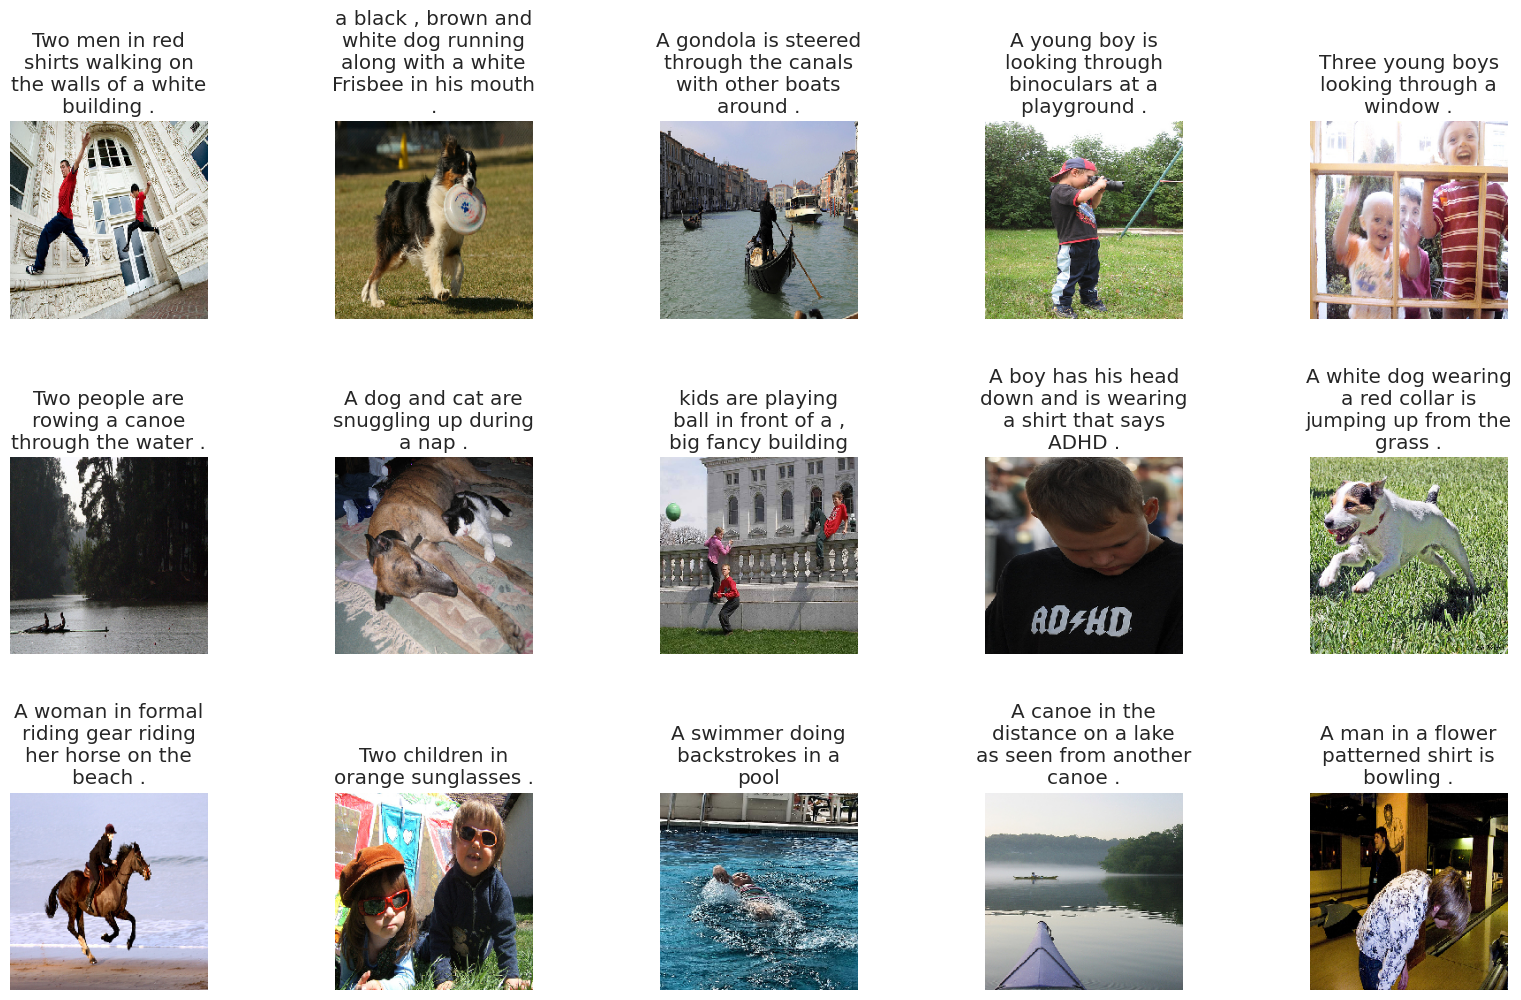

In [53]:
display_images(data.sample(15))

In [57]:


! git commit -m "updating changes"


Author identity unknown

*** Please tell me who you are.

Run

  git config --global user.email "you@example.com"
  git config --global user.name "Your Name"

to set your account's default identity.
Omit --global to set the identity only in this repository.

fatal: unable to auto-detect email address (got 'root@7b7851eb25e2.(none)')
